<a href="https://colab.research.google.com/github/NotAbdelrahmanelsayed/Hands-on-machine-learning/blob/main/Chapter_10_introduction_to_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print('tf\n',tf.__version__,'\nkeras')
keras.__version__
import numpy as np

tf
 2.8.2 
keras


**very excited to learn Deep learning!**

In [ ]:
# uploading the data

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print('shape of Training data X', X_train_full.shape)

4431872/4422102 [==============================] - 0s 0us/step
shape of Training data X (60000, 28, 28)


**let's get a validation set and scale the data**

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000],  y_train_full[5000:]

**defining the class names to know what we are dealing with**

In [ ]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

'Coat'

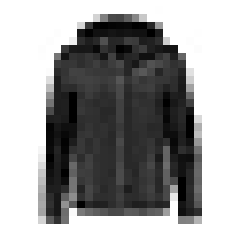

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'binary')
plt.axis('off');

**let's take a look at the data**

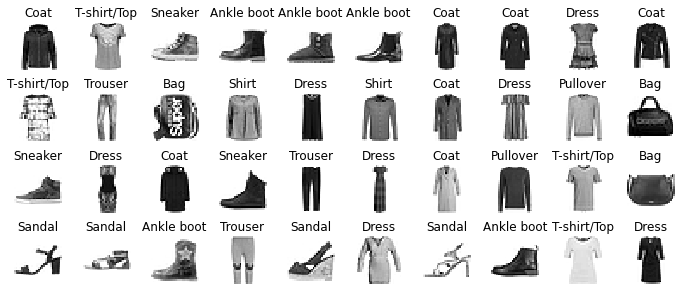

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**let's train a model (squential)**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]), # convert each input to 1D
    keras.layers.Dense(300, activation = 'relu'), # 300 : neuorons 
    keras.layers.Dense(100, activation = 'relu'), # 100 : neuorons 
    keras.layers.Dense(10, activation = 'softmax') # 300 : neuorons 
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


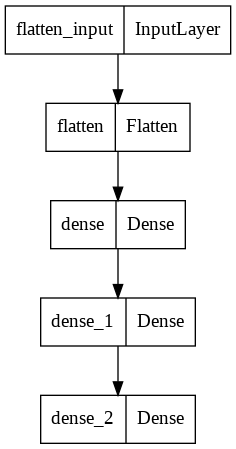

In [ ]:
keras.utils.plot_model(model)

In [ ]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

print(weights.shape,'\n\n', biases.shape)


(784, 300) 

 (300,)


**specify the loss-functio**

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
     )

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7294 - accuracy: 0.7602 - val_loss: 0.5193 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4892 - accuracy: 0.8304 - val_loss: 0.4477 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4428 - accuracy: 0.8440 - val_loss: 0.4187 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4160 - accuracy: 0.8536 - val_loss: 0.4115 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.4009 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8648 - val_loss: 0.3747 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3641 - accuracy: 0.8707 - val_loss: 0.3641 - val_accurac

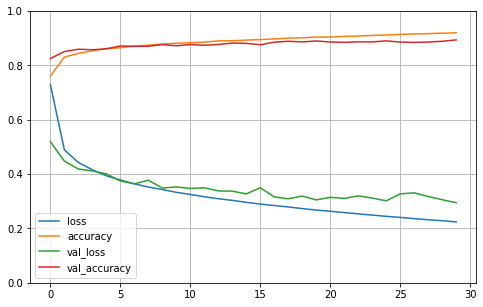

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Evaluate ?  maybe like predict and accuracy score ! 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 60.0380 - accuracy: 0.8540


[60.037994384765625, 0.8539999723434448]

let's predict some instances 

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

predict_class !  !!  ! .. 
get's the highest probality

In [ ]:
classes_X = np.argmax(y_proba, axis = 1)
classes_X

array([9, 2, 1])

In [ ]:
print('array classes names', np.array(class_names)[classes_X])

array classes names ['Ankle boot' 'Pullover' 'Trouser']


In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# What about regression usin MLP ^_^

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [ ]:
X_train[1]

array([   1.8355    ,   29.        ,    4.48736462,    1.12635379,
        836.        ,    3.01805054,   36.68      , -119.76      ])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train[1]

array([-1.07602229,  0.03214246, -0.39898872,  0.08328079, -0.50752491,
       -0.00372632,  0.50558256, -0.10632892])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [ ]:
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2835 - val_loss: 2.1174
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] 

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend it's a new instance xD
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: nan


In [ ]:
print(y_pred, '\n real val\n', y_test[:3])

[[nan]
 [nan]
 [nan]] 
 real val
 [1.636 1.188 1.375]


# Bulding Complex Models Using Functional API

In [ ]:
input_ = keras.layers.Input(shape = X_train.shape[1:]) # takes the shape of the training data

hidden1 = keras.layers.Dense(30, activation = 'relu')(input_) #dense layer with 30 neurons

hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) # we path it the output from the first hidden layer

concat = keras.layers.concatenate([input_, hidden2]) # concate the input and output from the last hidden layer

output = keras.layers.Dense(1)(concat) # ouput layer with single neuron without activation functions 

model = keras.Model(inputs = [input_], outputs = [output])


## compile and train the model 

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit( X_train, y_train, epochs = 25, validation_data = [X_valid, y_valid])


Epoch 1/25
363/363 [==============================] - 1s 2ms/step - loss: 1.0450 - val_loss: 1.8963
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 16.0426 - val_loss: 48.1783
Epoch 3/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/25
363/363 [========================

In [ ]:
eval = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: nan


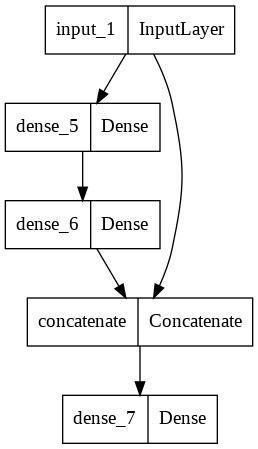

In [ ]:
keras.utils.plot_model(model)

# big comment i don't know if loss = 0.5 is god or not ...

## diffrent approach of training sending to subset of features (overlapping features) using multiple inputs

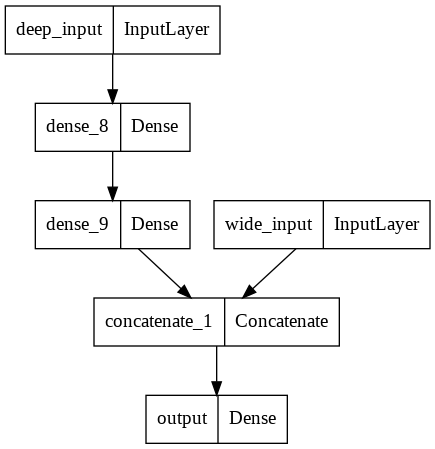

In [ ]:
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')

hidden1 = keras.layers.Dense(30, activation = 'relu') (input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
model = keras.Model(inputs =[input_A, input_B], outputs = [output])
keras.utils.plot_model(model)

The above model while calling fit method needs to inputs i.e(X_train_A, X_train_B)

In [ ]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr=1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [ ]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=50,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3890 - val_loss: 0.8686
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7782 - val_loss: 0.7620
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6940 - val_loss: 0.7044
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6425 - val_loss: 0.6583
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6059 - val_loss: 0.6267
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5783 - val_loss: 0.6038
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5569 - val_loss: 0.5829
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5404 - val_loss: 0.5678
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5279 - val_loss: 0.5550
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5173 - val_loss: 0.5450

OOP Time 🇩
we will build the same model in a class 

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units = 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs) # handles standard args
    self.hidden1 = keras.layers.Dense(units, activation = activation)
    self.hidden2 = keras.layers.Dense(units, activation = activation)

    self.main_output = keras.layers.Dense(1)
    self.aux_output  = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output - self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output


# how to save and restore a model ! 

In [ ]:
# model.save('my_first_model.h5')

# model = keras.models.load_model('my_first_model.h5')

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3209 - val_loss: 0.8747
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8873 - val_loss: 0.6930
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6652 - val_loss: 0.6612
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6181 - val_loss: 0.6384
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5953 - val_loss: 0.6187
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5757 - val_loss: 0.6004
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5580 - val_loss: 0.5846
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5692
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5287 - val_loss: 0.5573
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5235


In [ ]:
model.save("my_first_model.h5")
model = keras.models.load_model("my_first_model.h5")

In [ ]:
model.predict(X_new)

array([[1.8111818],
       [1.3108308],
       [1.1391311]], dtype=float32)

# using Callbacks


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]), # #hidden layer1
    keras.layers.Dense(30, activation = 'relu'), # hidden layer2
    keras.layers.Dense(1) # output layer
])
model.compile(loss = 'mse', optimizer = 'sgd')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_first_model.h5')

history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb]) # roll back to the best modet

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7986
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8357
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4555
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4149
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3987
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3875
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3811
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3754
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3690
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3641


## implement early stopping

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 100, 
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3614 - val_loss: 0.3845
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3554 - val_loss: 0.3938
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3518 - val_loss: 0.3786
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3491 - val_loss: 0.3739
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3455 - val_loss: 0.3726
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3450 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3407 - val_loss: 0.3652
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3376 - val_loss: 0.3644
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3356 - val_loss: 0.3577
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3347 - val_lo

**As We can see training stops at 57 because there is no benefit from training more thats great**
can i use earlystopping without cb ? let's try it 

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 1000, 
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping])

Epoch 1/1000
363/363 [==============================] - 2s 4ms/step - loss: 0.2781 - val_loss: 0.3191
Epoch 2/1000
363/363 [==============================] - 1s 4ms/step - loss: 0.2780 - val_loss: 0.3231
Epoch 3/1000
363/363 [==============================] - 2s 5ms/step - loss: 0.2753 - val_loss: 0.3094
Epoch 4/1000
363/363 [==============================] - 2s 5ms/step - loss: 0.2755 - val_loss: 0.3156
Epoch 5/1000
363/363 [==============================] - 1s 3ms/step - loss: 0.2750 - val_loss: 0.3231
Epoch 6/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.2760 - val_loss: 0.3164
Epoch 7/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.2751 - val_loss: 0.3295
Epoch 8/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.2752 - val_loss: 0.3141
Epoch 9/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.2744 - val_loss: 0.3169
Epoch 10/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.271

great approach training using callbacks and early stopping ! 

## TensorBoard for Visualization !  ! 

In [ ]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')


In [ ]:
def get_run_logdir():
  import time
  run_id = time.strftime('run_%Y_%m_%d---%H:%M___%S')
  return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_09_18---20:27___26'

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30, 
                    validation_data = (X_valid, y_valid),
                    callbacks = [tensorboard_cb])


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006